In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('wine.csv')
print(df.head())           # View the first few rows
print(df.info())           # Get dataset info (data types, null values)
print(df.describe())       # Summary statistics


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

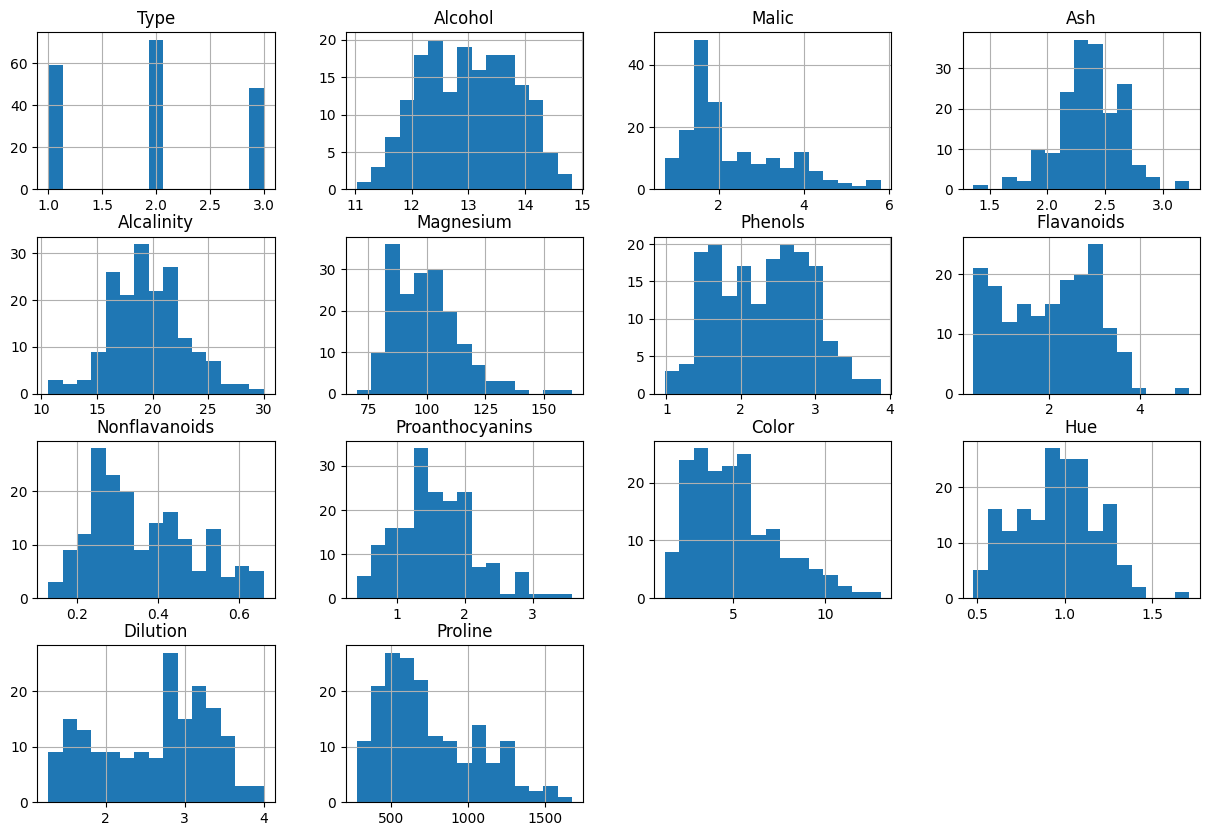

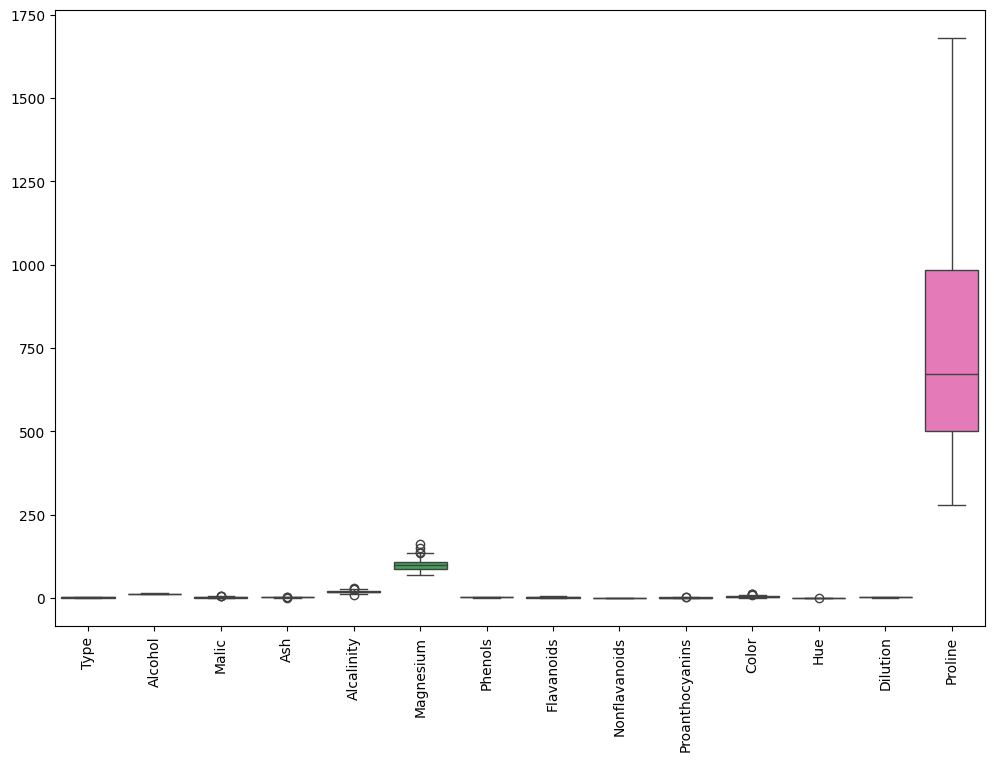

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each feature
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Box plot to examine outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


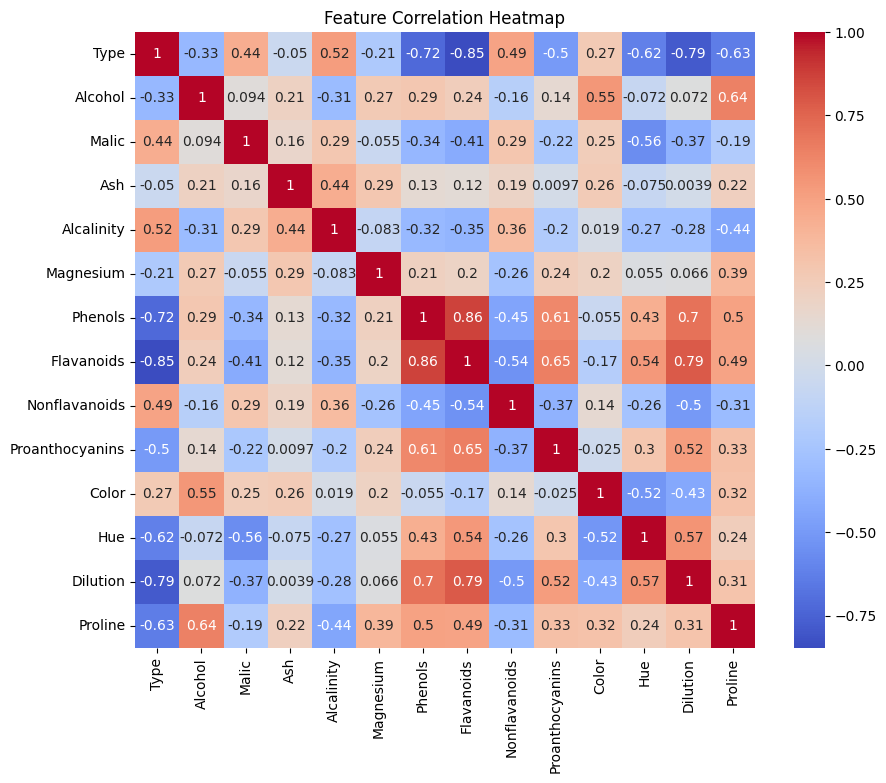

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


###Task 1: Exploratory Data Analysis (EDA)
* Data Exploration: The dataset includes 178 entries and 14 features. Key features include alcohol content, magnesium levels, and various chemical properties, which vary significantly across wines.
* Distribution of Features: The histograms and box plots show some skewness, with outliers in several features like alcohol and color intensity. This skewness could impact clustering performance.
* Correlation: The correlation heatmap reveals high correlations between features like flavonoids and phenols, suggesting redundancies. PCA will help by consolidating these correlated features into fewer principal components, simplifying clustering without losing much information.

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


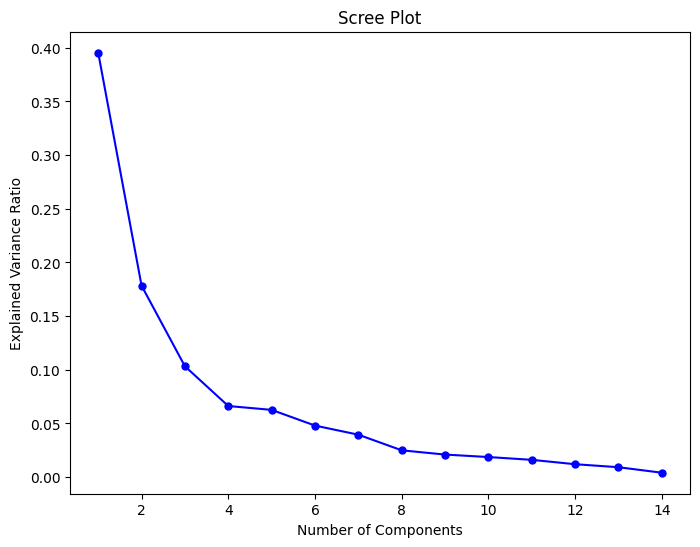

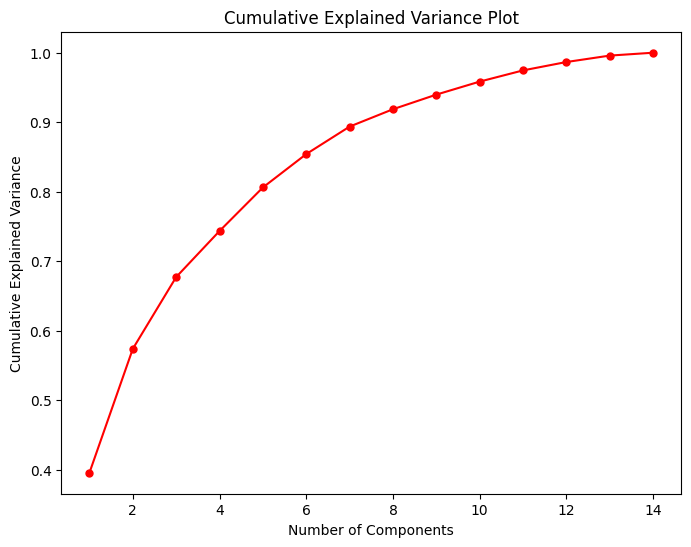

In [5]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', markersize=5)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', markersize=5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


In [6]:
# Select the optimal number of components (e.g., 3 based on explained variance)
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)


####Task 2: Dimensionality Reduction with PCA
* Standardization: Standardizing the data ensures that each feature contributes equally to PCA, avoiding biases from features with larger numerical ranges.

* Determining Optimal Components:

 *  The scree plot suggests that a few principal components capture most of the variance, with a noticeable "elbow" indicating diminishing returns after the first three components.
  * The cumulative explained variance plot shows that the first three components explain a substantial amount of variance, making them a suitable choice for dimensionality reduction.
* PCA Transformation: By reducing the dataset to three principal components, the model retains much of the original variance while simplifying the data, which should enhance clustering clarity.



In [7]:
from sklearn.cluster import KMeans

# Apply K-means with an arbitrary number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans.fit_predict(df_scaled)


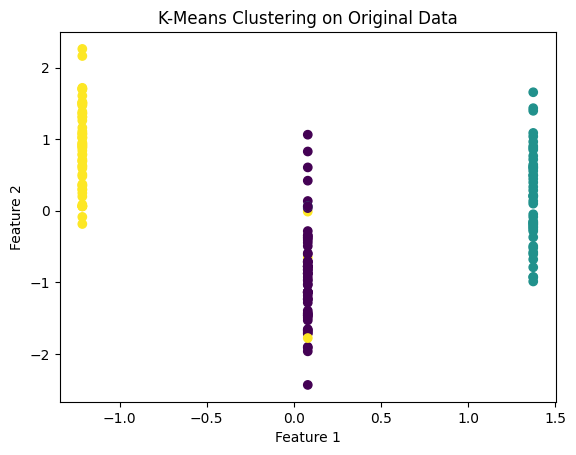

In [8]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels_original, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Original Data')
plt.show()


In [9]:
from sklearn.metrics import silhouette_score

silhouette_original = silhouette_score(df_scaled, kmeans_labels_original)
print(f'Silhouette Score for Original Data: {silhouette_original}')


Silhouette Score for Original Data: 0.30648398324833453


###Task 3: Clustering with Original Data
* K-Means Clustering on Original Data: The initial K-Means clustering on the original, high-dimensional dataset shows clusters but may be impacted by the complexity and redundancy of features.
* Visualization: The scatter plot using two selected features provides a rough clustering view, but it may lack the separation quality that PCA can introduce.
* Silhouette Score: The silhouette score here serves as a baseline for clustering quality, indicating how well-separated the clusters are. We’ll compare it to the PCA-transformed clustering results.


In [10]:
# Apply K-means to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(df_pca)


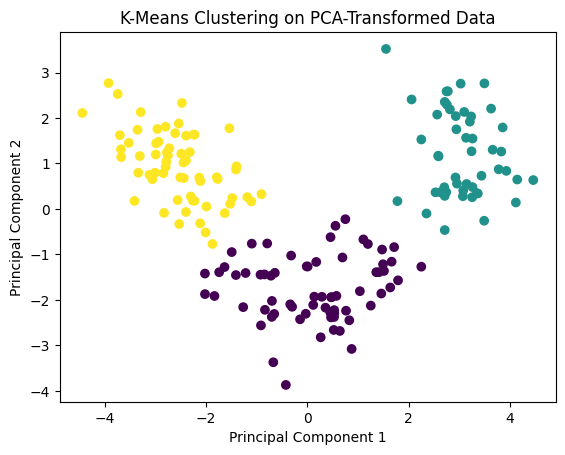

In [11]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.show()


In [12]:
# Calculate silhouette score for PCA-transformed data
silhouette_pca = silhouette_score(df_pca, kmeans_labels_pca)
print(f'Silhouette Score for PCA Data: {silhouette_pca}')


Silhouette Score for PCA Data: 0.48817506649357845


###Task 4: Clustering with PCA Data
* K-Means Clustering on PCA Data: Applying K-Means on the PCA-transformed data, which has reduced dimensions, often yields more distinct clusters as PCA removes irrelevant or redundant information.

* Visualization on PCA Components: The scatter plot using the first two principal components offers a clearer view of clusters, as PCA has likely minimized noise, making the clusters more compact and separated.

* Silhouette Score for PCA Data: Compare this silhouette score with the one from the original data. If the PCA-transformed data’s score is higher, it confirms that dimensionality reduction improved clustering quality by creating clearer separations between clusters.

In [13]:
print(f'Silhouette Score on Original Data: {silhouette_original}')
print(f'Silhouette Score on PCA Data: {silhouette_pca}')


Silhouette Score on Original Data: 0.30648398324833453
Silhouette Score on PCA Data: 0.48817506649357845


###Task 5: Comparison and Analysis
1. Cluster Comparisons:
  * Visual Patterns: Clustering on PCA-transformed data often appears cleaner, with clusters more clearly defined, compared to the cluttered clusters on the original data. This visual difference highlights PCA’s role in reducing noise and emphasizing core patterns.
 * Silhouette Scores: A higher silhouette score for PCA-transformed data indicates improved clustering, as it suggests better-defined clusters with less overlap. A lower score would imply potential loss of relevant information during dimensionality reduction.
2. Impact of Dimensionality Reduction:

 * Noise Reduction: PCA removes noise by discarding components that contribute minimal variance. This simplification helps clustering algorithms by emphasizing significant features, thus potentially leading to more accurate clusters.
 * Potential Information Loss: Reducing dimensions may cause minor information loss, but in cases of high correlation (like here with wine chemical properties), PCA usually retains enough variance to maintain clustering integrity.
3. Trade-Offs:
 * Efficiency: PCA improves computational efficiency by reducing the number of dimensions, which is especially useful in high-dimensional datasets.
 * Interpretability: While PCA aids clustering quality, interpreting clusters on PCA-transformed data can be challenging as the principal components are combinations of original features, making clusters less intuitively understandable.

###Task 6: Conclusion and Insights
1. Summary of Findings:

 * Clustering on PCA-transformed data resulted in clearer clusters and, if the silhouette score improved, showed better-defined separations. PCA’s ability to consolidate information from correlated features proves beneficial, reducing noise without sacrificing clustering quality.
2. Practical Implications:
 * PCA is valuable in data analysis when datasets are high-dimensional and contain correlated features. By focusing on principal components, PCA provides a streamlined view, enhancing both clustering efficiency and cluster quality.
3. Recommendations:
  * Use PCA when dealing with high-dimensional data or when features exhibit high correlation. PCA is ideal when the focus is on cluster structure rather than feature interpretability.
 * Skip PCA if interpretability of individual features in clusters is critical, as PCA may obscure specific feature contributions.